In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
df_test=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/test.csv' , sep=";")
df_train=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/train.csv' , sep=";")


In [45]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [47]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [49]:
# combine the train and test data
df_combined = pd.concat([df_train, df_test], ignore_index=True)

df_combined.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
df_train['source'] = 'train'
df_test['source'] = 'test'

In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


## EDA 

### Quantity exploration

In [52]:
df_combined.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


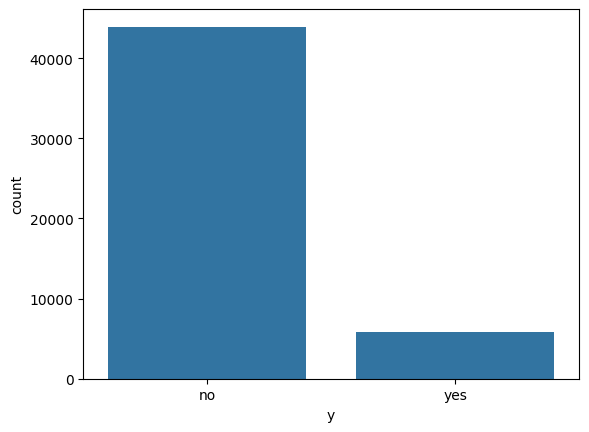

In [75]:

sns.countplot(df_combined , x = "y")
plt.xticks
plt.show()

# Display whether the customer has subscribed to a deposit
# which is highly imbalanced

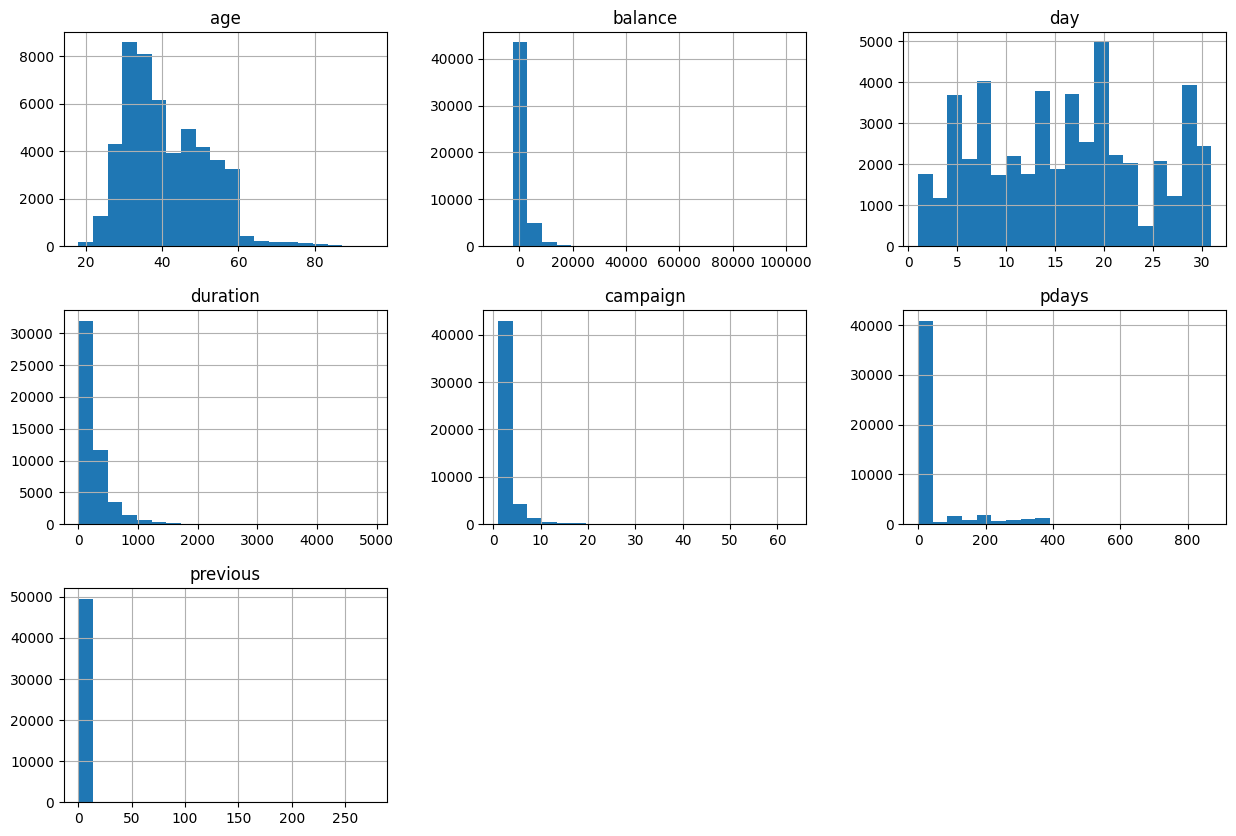

In [54]:
df_combined.hist(bins=20, figsize=(15, 10))
plt.show()

In [55]:
df_combined['job'].value_counts()

job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64

### Relationship with y

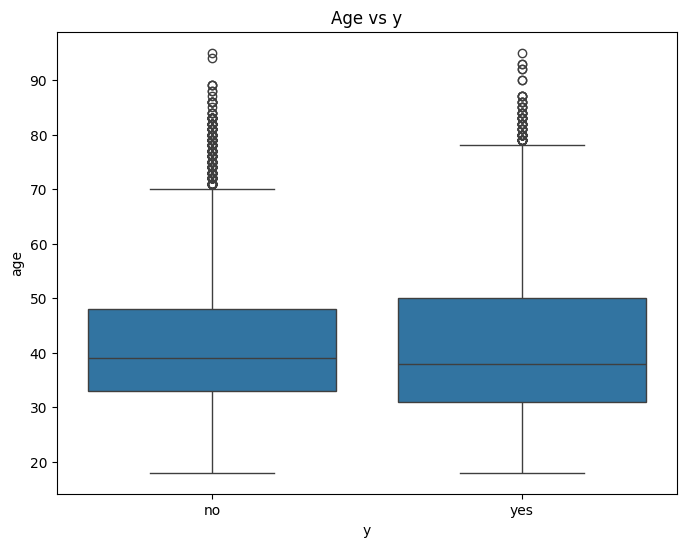

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df_combined)
plt.title('Age vs y')
plt.show()

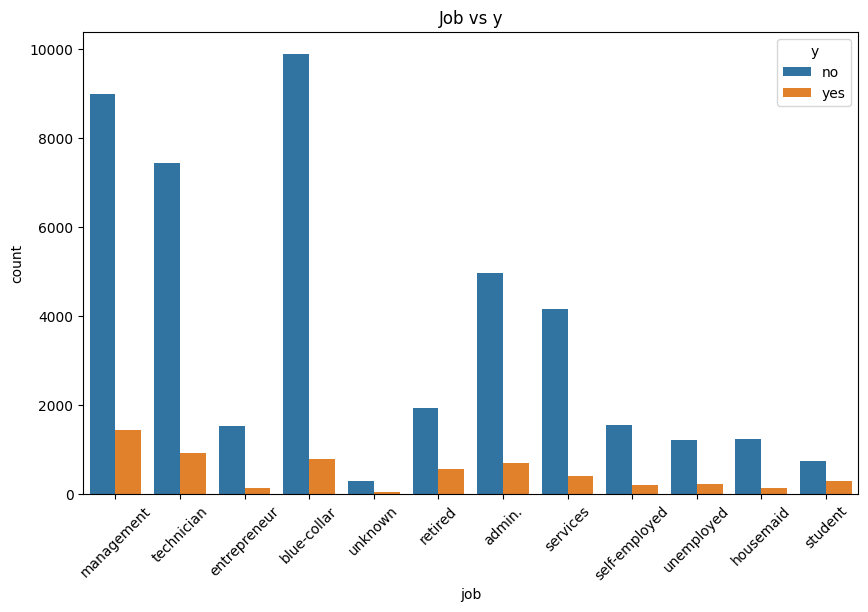

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df_combined)
plt.title('Job vs y')
plt.xticks(rotation=45)
plt.show()

## Data Clean


In [58]:
df_combined.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

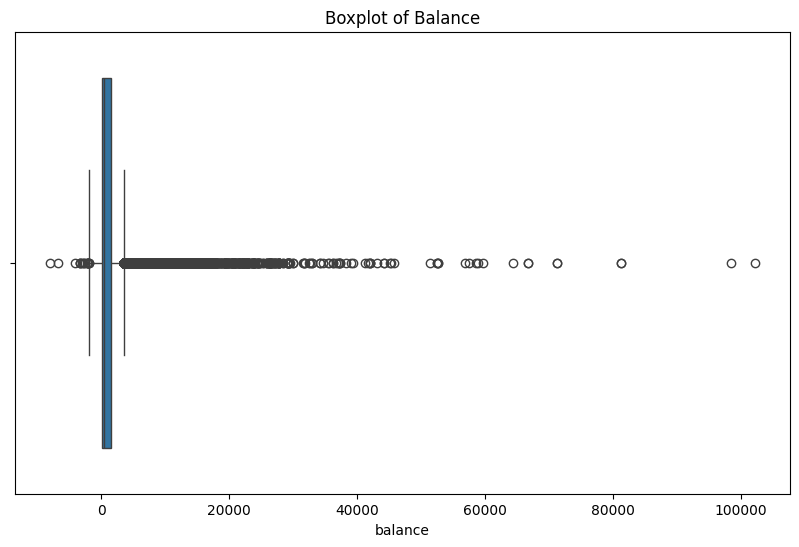

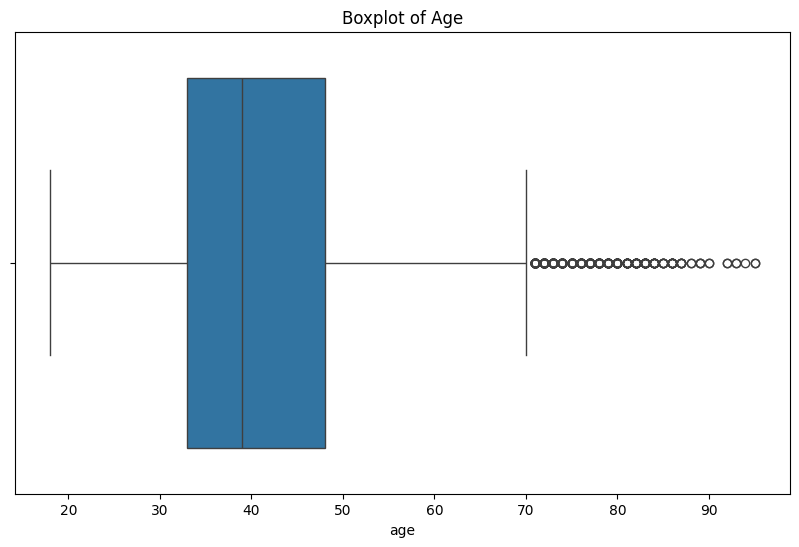

In [59]:
# check for outliers for age and balance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['balance'])
plt.title('Boxplot of Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined['age'])
plt.title('Boxplot of Age')
plt.show()

In [68]:

# calculate the upper limit for balance
upper_limit = df_combined['balance'].mean() + 3 * df_combined['balance'].std()
balance_mean = df_combined['balance'].mean()
# use the mean to replace the outliers
df_combined['balance'] = np.where((df_combined['balance'] > upper_limit), 
                                  balance_mean, df_combined['balance'])

# same for age
upper_limit_age = df_combined['age'].mean() + 3 * df_combined['age'].std()
age_mean = df_combined['age'].mean()
# use the mean to replace the outliers
df_combined['age'] = np.where((df_combined['age'] > upper_limit_age),
                              age_mean, df_combined['age'])

print(df_combined)


        age            job  marital  education default  balance housing loan  \
0      58.0     management  married   tertiary      no   2143.0     yes   no   
1      44.0     technician   single  secondary      no     29.0     yes   no   
2      33.0   entrepreneur  married  secondary      no      2.0     yes  yes   
3      47.0    blue-collar  married    unknown      no   1506.0     yes   no   
4      33.0        unknown   single    unknown      no      1.0      no   no   
...     ...            ...      ...        ...     ...      ...     ...  ...   
49727  33.0       services  married  secondary      no   -333.0     yes   no   
49728  57.0  self-employed  married   tertiary     yes  -3313.0     yes  yes   
49729  57.0     technician  married  secondary      no    295.0      no   no   
49730  28.0    blue-collar  married  secondary      no   1137.0      no   no   
49731  44.0   entrepreneur   single   tertiary      no   1136.0     yes  yes   

        contact  day month  duration  c

In [67]:
# hot encoding
df_combined_encoded = pd.get_dummies(df_combined, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
print(df_combined_encoded.head())

    age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0  58.0   2143.0    5       261         1     -1         0  no       False   
1  44.0     29.0    5       151         1     -1         0  no       False   
2  33.0      2.0    5        76         1     -1         0  no       False   
3  47.0   1506.0    5        92         1     -1         0  no       False   
4  33.0      1.0    5       198         1     -1         0  no       False   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0            False  ...      False      False       True      False   
1            False  ...      False      False       True      False   
2            False  ...      False      False       True      False   
3             True  ...      False      False       True      False   
4            False  ...      False      False       True      False   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0      False      False  

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the numerical columns
df_combined_encoded[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df_combined_encoded[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

df_combined_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.731519,0.614094,5,0.008962,-0.57003,-0.411068,-0.255849,no,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.335229,-0.620990,5,-0.417824,-0.57003,-0.411068,-0.255849,no,False,False,...,False,False,True,False,False,False,False,False,False,True
2,-0.761856,-0.636764,5,-0.708814,-0.57003,-0.411068,-0.255849,no,False,False,...,False,False,True,False,False,False,False,False,False,True
3,0.634434,0.241933,5,-0.646736,-0.57003,-0.411068,-0.255849,no,False,True,...,False,False,True,False,False,False,False,False,False,True
4,-0.761856,-0.637349,5,-0.235470,-0.57003,-0.411068,-0.255849,no,False,False,...,False,False,True,False,False,False,False,False,False,True


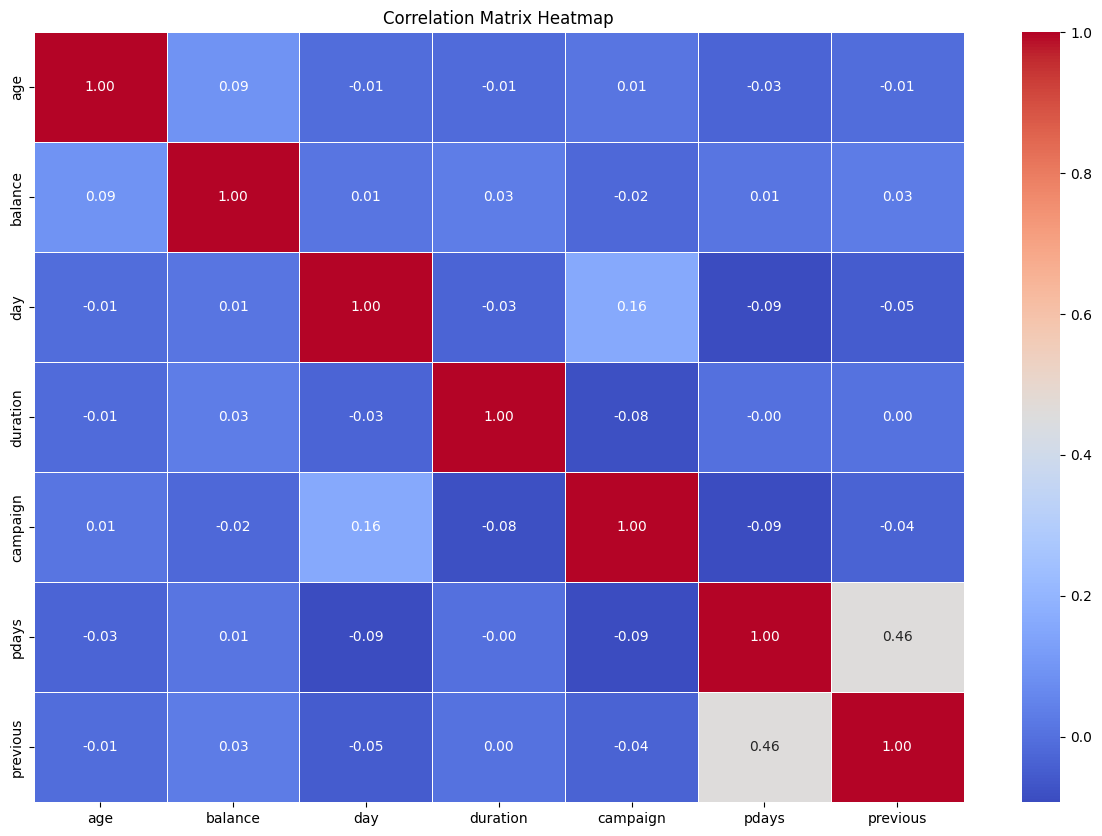

In [73]:
# remove the target column from the combined dataset
df_numeric = df_combined_encoded.select_dtypes(include=[np.number])

# heatmap to show the correlation between the features
corr_matrix = df_numeric.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Data balance


In [76]:
df_combined_encoded['y'].value_counts()

y
no     43922
yes     5810
Name: count, dtype: int64

## Build models

In [77]:
print(df_combined_encoded.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


### logistic model

In [ ]:
# Define the features (X) and the target (y)
X = joint_dataX = joint_data[['number_of_clicks','age', 'number_of_emails_opened','average_transaction_amount', 'tenure', 'recency', 'response','gender']]
y = joint_data['clv_class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
